# Intro to Line Fitting

---
Today, we will start learning how to fit data and extract parameters...
 



First, let's import the tools that we will need:

In [1]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import scipy


## Fitting

Let's start by making a simple dataset.  We will use the example we have used in class of an object falling.    


Text(0, 0.5, 'v (m/s)')

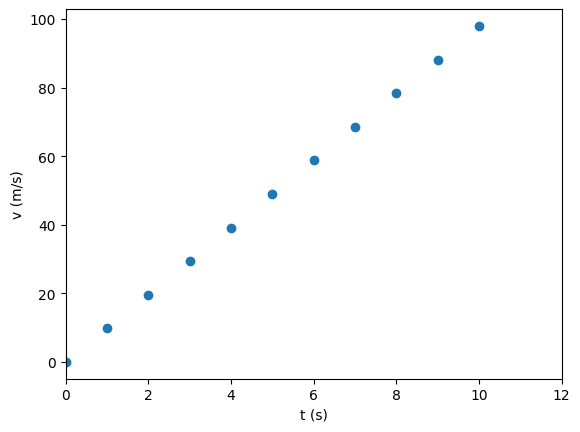

In [2]:

x_data = np.linspace(0, 10, num=11)
y_data = 9.8*x_data

plt.figure() 
plt.scatter(x_data, y_data)
plt.xlim(xmax = 12.0, xmin = 0)
plt.xlabel("t (s)")
plt.ylabel("v (m/s)")

This is not realistic; data is never this perfect. Let's try to put in some measurement error.

Text(0, 0.5, 'v (m/s)')

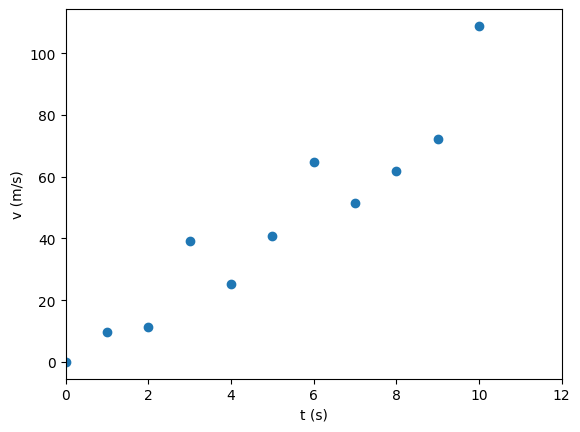

In [3]:

# Seed the random number generator for reproducibility
np.random.seed(2)

x_data = np.linspace(0, 10, num=11)

#Here we are smearing our values with Gaussian random number y(1+-.2)
y_data = 9.8*x_data*(1+np.random.normal(size=11)/5.0) 


# And plot it
plt.figure()
plt.scatter(x_data, y_data)
plt.xlim(xmax = 12.0, xmin = 0)
plt.xlabel("t (s)")
plt.ylabel("v (m/s)")


Let's see how we could fit it to a line and extract the best fit parameters.  For fitting in this class, we will start with the "optimize" method from the scipy.

First, we also need to define our function.  Our data looks linear (y=ax+b), so let's try that first and see what we get..

In [4]:
def test_func(x, a, b):
    return a*x+b 

Here is the basic use of the "optimize" function:

In [21]:
params, params_covariance = scipy.optimize.curve_fit(test_func, x_data, y_data)#,p0=[10, 0])

#print(params)
print('y = %.5f * x + %.5f' % (params[0], params[1]))


y = 9.18376 * x + -1.84023


Great, we got the best-fit parameters and wrote them to the screen (we will learn more about the covariance matrix later).  Let's plot the resulting best fit line on the data and see how it looks.

Text(0, 0.5, 'v (m/s)')

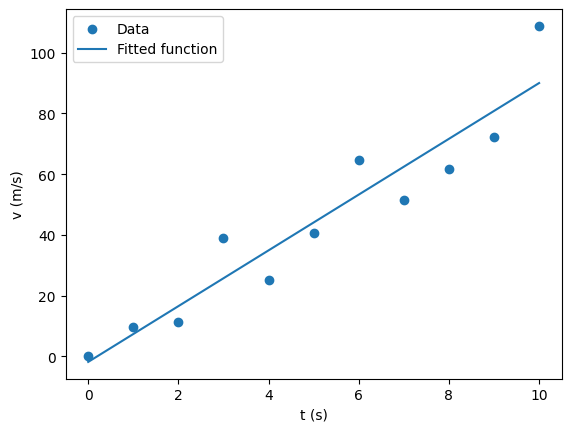

In [6]:
plt.figure()
plt.scatter(x_data, y_data, label='Data')
plt.plot(x_data, test_func(x_data, params[0], params[1]),label='Fitted function')

plt.legend(loc='best')
plt.xlabel("t (s)")
plt.ylabel("v (m/s)") 

## **EXERCISE 1**:  
<span style="color:red"> make a new function where you fix the y-intercept of your function to zero.  That is, your new function will be a line with only one parameter - the slope.  Make this new function, and fit the the data.  How did the value of the best fit slope change?  It should come closer to the input value of 9.8...   </red>

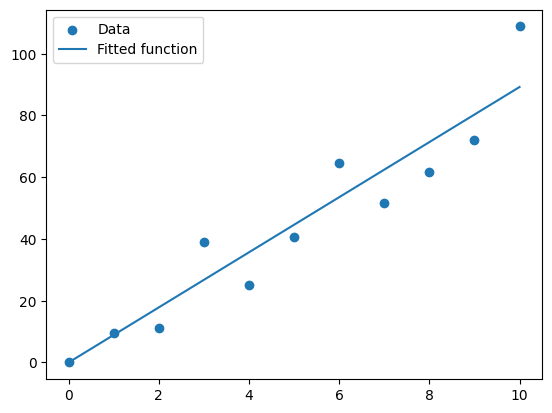

In [23]:
#Put your code here
def testfunc(a, x):
    return a*x
params, params_covariance=scipy.optimize.curve_fit(testfunc, x_data, y_data)
plt.figure()
plt.scatter(x_data, y_data, label='Data')
plt.plot(x_data, testfunc(params[0], x_data),label='Fitted function')

plt.legend(loc='best')

By constraining the function used in the fit based on our knowledge, we got a better model of our data.  This is part of the game when trying to find the best model, and to extract parameters with small uncertainties...  

## The Gaussian  (Normal Distribution)

  Due to the [Central Limit Theorom](https://en.wikipedia.org/wiki/Central_limit_theorem),  the Gaussian is probably the most common function used to fit data.  

Scipy comes with a method for fitting to a normal distribution!!  



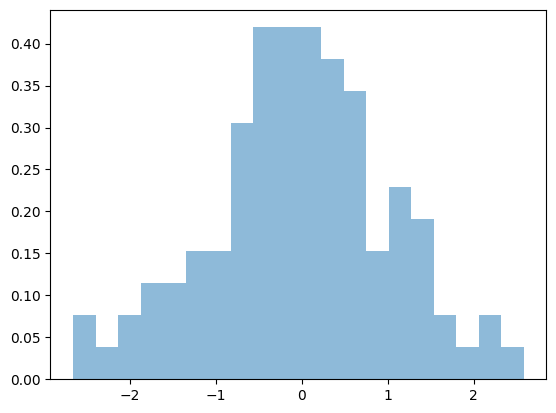

In [8]:
data = np.random.normal(0, 1, 100)  #Draw some random data from the normal distribution
bin_values, bins, myart = plt.hist(data, 20, density=1, alpha=0.5)  #Fill a histogram and draw it

Does that look Gaussian?  It is, but it has limited statistics.  Now, let's fit this histogram to a Gaussian, and see how it looks:



 The best fit parameters are:  mu=-0.0083  sigma= 1.0 




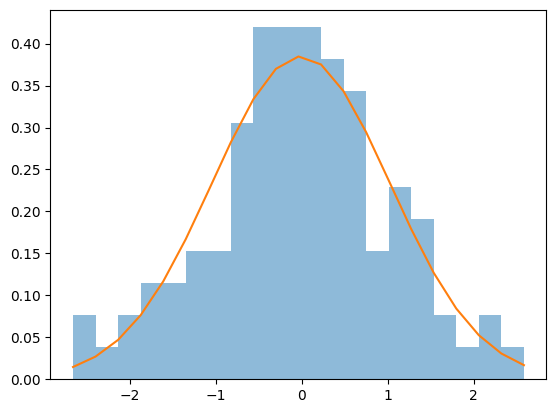

In [9]:
mu, sigma = scipy.stats.norm.fit(data)

print(f"\n\n The best fit parameters are:  mu={mu:4.2}  sigma={sigma:4.2} \n\n")

best_fit_line = scipy.stats.norm.pdf(bins, mu, sigma)
bin_values, bins, myart = plt.hist(data, 20, density=1, alpha=0.5)
plt.plot(bins, best_fit_line)

## **EXERCISE 2**:  
<span style="color:red">  Redo the example above, but with 10,000 entries in your histogram.  What changes?     </red>

In [10]:
#Put your code here

Put your comments on what changes here...  

## **EXERCISE 3**:  
<span style="color:red">  Heights of adults might satisfy the requirements for a normal distribution (independent and identically-distributed variables). You should still have your heights dataset available (the one with the actual measurements, not simulated data). Use a Gaussian fit on your dataset and use it to determine what normal distribution fits your data.  In other words, what mu and sigma will produce the best fit?  How do they compare to the sample mean and sample standard deviation? </red>

In [11]:
#Put your code here

Compare the Gaussian means and sigmas to the values directly calculated from the samples here. 